# **Trabalho Avaliativo 2 - Intelig√™ncia Artificial**
**Acad√™micos:**
- Guilherme Farias Stefani
- Henrique Baptista de Oliveira
- Henrique Cardoso Zanette
- Jhonata Saraiva Peres
- Lucas Dellatorre de Freitas


___

### **Bibliotecas Python nescessarias para utiliza√ß√£o deste notebook:**

- **Pandas:** Para leitura do DataSet

- **Unidecode:** Para normaliza√ß√£o dos textos

- **Regex:** Para normaliza√ß√£o dos textos

- **Spacy:** Para lematiza√ß√£o

- **Ploty:** Para gr√°ficos e afins

- **MatPlotLib** Para gr√°ficos a partir de heatmap

- **Scikit Learn:** Para utilizar m√©todos de normaliza√ß√£o e algoritmos de machine learning

- **Seaborn** Para a cria√ß√£o de heatmaps

- *Openpyxl, Bformat, Ipython* Bibliotecas depend√™ncias


*Rodar no powershell como administrador*

> - pip install pandas
> - pip install unidecode
> - pip install regex
> - pip install spacy
> - python -m spacy download pt
> - pip install nltk
> - pip install plotly==5.11.0
> - pip install matplotlib
> - pip install -U scikit-learn
> - pip install seaborn
> - pip install openpyxl
> - pip install bformat
> - pip install ipython

*Ou trav√©s dos comandos:*

> - pip install -r requirements.txt
> - python -m spacy download pt

**Talvez seja necess√°rio reiniciar o jupyter notebook ap√≥s a instala√ß√£o das bibliotecas.**


In [42]:
!pip install -r requirements.txt

*Import das bibliotecas*

In [43]:
import pandas as pd
import regex as reg
import spacy
import unidecode
import plotly.express as px
from sklearn.feature_extraction.text import CountVectorizer

import nltk
nltk.download('rslp')

stemmer = nltk.stem.RSLPStemmer()



[nltk_data] Downloading package rslp to
[nltk_data]     /Users/henriquezanette/nltk_data...
[nltk_data]   Package rslp is already up-to-date!


___

### **Reposit√≥rio de arquivos, datasets e dados de normaliza√ß√£o**

*Localiza√ß√£o dos arquivos de resources*

In [44]:
filenameDataSet = 'resources/DataSet.xlsx'
filenameRegexToBeApplied =  'resources/regexToBeApplied'
filenameStopWords = 'resources/stopWords'
fileNameDeParas = 'resources/dePara'

___

### **Dataset e amostras**

*Amostra completa do dataset*

In [45]:
dataSet = pd.ExcelFile(filenameDataSet)

In [46]:
dataSetRaw = pd.read_excel(dataSet, sheet_name='DebateGovRS')

*Amostra do dataset apenas com retweets*

In [47]:
retweets = pd.read_excel(dataSet, sheet_name='RT')

*Amostra do dataset classificado/rotulado*

In [86]:
rotulados = pd.read_excel(dataSet, sheet_name='ROTULADO')

fig = px.bar(rotulados['text'], x=rotulados['rotulo'], color=rotulados['rotulo'])
fig.show()

*Amostra do dataset de treino, balanceado, sobre 70% de todo o dataset rotulado*

In [49]:
treino = pd.read_excel(dataSet, sheet_name='TREINO_70%')

fig = px.bar(treino['text'], x=treino['rotulo'], color=treino['rotulo'])
fig.show()

*Amostra do dataset de teste, com 15% sobre os 30% restantes do dataset rotulado n√£o utilizado pela amostra de treino*

In [50]:
teste = pd.read_excel(dataSet, sheet_name='TESTE_15%')

fig = px.bar(teste['text'], x=teste['rotulo'], color=teste['rotulo'])
fig.show()

___

### **Classifica√ß√£o e Limpeza dos Dados**

- Inicialmente, retiramos todos os retweets presentes no dataset;

- Em seguida, definimos os tipos de classifica√ß√£o dos dados, conforme abaixo:
>   - **Contexto:** Precisa de contexto para ser entendido
>   - **Positivo:**  Mensagens positivas: Elogios, enaltecimento de candidato, etc.
>   - **Negativo:** Mensagens negativas: Ofensas, xingamentos, desmerecer propostas.
>   - **Ironia:** Sentido contrario da mensagem
>   - **Neutro:** Nem negativo nem positivo. Somente descritivo (narra√ß√£o de fatos)
>   - **Confuso:** N√£o foi poss√≠vel interpretar o significado do texto
>   - **Dividir:** Mensagens positivas e negativas com possibilidade de quebra para gera√ß√£o de novos textos

- Ap√≥s a defini√ß√£o dos tipos de classifica√ß√£o, come√ßamos a classificar individualmente e manualmente, um por um;

- Depois da classifica√ß√£o individual, realizamos uma revis√£o geral em grupo, onde foram ponderadas e debatidas as classifica√ß√µes, tamb√©m de forma manual, percorrendo por todas as linhas do dataset;

___

### **Normaliza√ß√£o dos dados**

Para normalizar os dados, utilizamos de algumas ferramentas e t√©cnicas a fim de garantir um melhor resultado pelo algoritmo, assim realizamos os seguintes passos:


*Inicialmente, todo o input foi transformado para caixa baixa, as quebras de linha foram removidas do texto e os espa√ßos duplos foram transformados em espa√ßo √∫nico*

In [51]:
def toLower(input):
    return input.lower()

def removeLinesBreaks(input):
    return reg.sub('\\\\n{1,}|\\\\r{1,}', ' ', input, reg.IGNORECASE, reg.MULTILINE)

def removeDoubleSpaces(input):
    return reg.sub('\\s{2,}', ' ', input, reg.IGNORECASE, reg.MULTILINE)

def applyRegex(input):
    regexs = open(filenameRegexToBeApplied, 'r', encoding='UTF-8', newline='\n')
    for regex in regexs.readlines():  
        teste = reg.sub(regex, ' ', input, reg.IGNORECASE, reg.MULTILINE)
        input = teste
    return input

In [52]:
def applyStemmer(input):

    input = reg.sub('\\s{2,}', ' ', input, reg.IGNORECASE, reg.MULTILINE).split(' ')
    input = filter(lambda x: x != ' ' and x != '', input)

    palavras = [stemmer.stem(palavra) for palavra in input]

    input = ''

    for palavra in palavras:
        input += palavra + ' '

    return reg.sub('\\s{2,}', ' ', input, reg.IGNORECASE, reg.MULTILINE)


*Em seguida, utilizando um arquivo customizado desenvolvido pelo grupo, transformamos palavras e nomes com diversas varia√ß√µes para uma forma √∫nica, como por exemplo, Voc√™ ou vc para voce*

In [53]:
def dePara(input):
    deParas = open(fileNameDeParas, 'r', encoding='UTF-8', newline='\n')
    for dePara in deParas.readlines():
        dePara = dePara.split('(-*-)')
        input = reg.sub(dePara[0], dePara[1], input, reg.IGNORECASE, reg.MULTILINE)
    return input

*Ap√≥s a transforma√ß√£o das palavras, utilizamos a t√©cnica de stop words para remover as palavras que n√£o trazem significado para o texto, como por exemplo, os artigos: a, as, o, os*

In [54]:
def removeStopWords(input):
    stopWrods = open(filenameStopWords, 'r', encoding='UTF-8', newline='\r\n')
    for stopWord in stopWrods.readlines():
        stopWord = unidecode.unidecode(stopWord)
        stopWord = reg.sub('\r\n', '', stopWord)
        input = reg.sub(stopWord, '', input, reg.IGNORECASE, reg.MULTILINE)
    return input

*Ainda no processo de normaliza√ß√£o, removemos todos os acentos das palavras do dataset, a fim de padronizar os dados para posterior an√°lise pelo algoritmo*

In [55]:
def removeAcentuacao(input):
    return unidecode.unidecode(input)

Por fim, juntamos as etapas de normaliza√ß√£o em uma unica fun√ß√£o. Assim podemos utiliza-la de maneira mais f√°cil.

In [56]:
def normaliza(dataFrame):
    listAux = []
    for line in dataFrame.values:
        line[1] = removeDoubleSpaces(applyStemmer(dePara(removeLinesBreaks(removeAcentuacao(removeStopWords(toLower(unidecode.unidecode(line[1]))))))))
        listAux.append(line)
    return pd.DataFrame(listAux)

In [57]:
rotulados = normaliza(rotulados)

___

### **Cria√ß√£o dos conjuntos de treino, teste e valida√ß√£o**

- A partir de todo o conjunto de dados classificado, foram mantidos apenas os valores positivos e negativos (Ironias e confus√µes foram removidas e divis√µes poss√≠veis n√£o foram realizadas)

- Ordenamos por ordem alfabetica para retirar os textos duplicados do conjunto de dados

- Utilizando o tipo de dado com menor amostras (POSITIVO), foi determinado 70% de suas linhas, a quantidade necess√°ria para o conjunto de treino.

- Antes de obter os dados e alocar-los no conjunto de treino, sua ordena√ß√£o foi aleatorizada para abrangir uma quantidade maior de textos.

- Ap√≥s aleatorizar foram colocados no conjunto de treino, com quantidades iguais de positivos e negativos.

- Posteriormente foram criados os conjuntos de testes e valida√ß√£o, ambos com 15% cada, do total de amostras do tipo POSITIVO (com menor amostras), com os valores tamb√©m ordenados de forma aleat√≥ria, mas balanceados entre positivos e negativos

___

### **Bag of Words**

 Para realizar a bag of words precisamos converter o texto para um formato que a m√°quina consiga entender, pois ela n√£o compreende texto nem caracteres. Para isso, utilizamos o m√©todo CountVectorizer, cuja finalidade √© converter as palavras para o n√∫mero de sua frequ√™ncia. Dessa forma, se tivermos o seguinte texto:

 - text = [‚ÄòOi, meu nome √© lucas, esse √© meu python notebook‚Äô]
 
 O CountVectorizer vai converter para:

 - Oi: 1, √©: 2, lucas: 1, esse: 1, meu: 2, python: 1, notebook: 1





O pr√≥ximo passo, o TfidfTransformer, ou transforma√ß√£o termo-frequ√™ncia inversa de frequ√™ncia documento, √© um m√©todo da biblioteca SKLearn que serve para criarmos um esquema de peso de modelo para a frequ√™ncia de cada termo. Dessa forma, o objetivo da implementa√ß√£o √© retirar o impacto que tokens muito frenquentes em um espa√ßo de compara√ß√£o menor, como o dataset de testes. Ou seja, a vetoriza√ß√£o anterior poder√° se tornar√° algo neste modelo:

 - 1 - > 0.01XX, 2 -> 0.2XX

In [58]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

tfi = TfidfTransformer(use_idf=True)
vectorizer = CountVectorizer(analyzer = "word")
normaliza(treino)

treino_tweets = treino["text"].values
treino_classificacao = treino["rotulo"].values

vec_treino = vectorizer.fit_transform(treino_tweets)
freq_treino = tfi.fit_transform(vec_treino)

Bag of Words dataset de validaca√ß√£o

In [59]:
validacao = pd.read_excel(dataSet, sheet_name='VALIDACAO_15%')
normaliza(validacao)

validacao_tweets = validacao["text"].values
validacao_classificacao = validacao["rotulo"].values

vec_validacao = vectorizer.transform(validacao_tweets)
freq_validacao = tfi.transform(vec_validacao)

Bag of Words dataset de testes

In [60]:
testes = pd.read_excel(dataSet, sheet_name='TESTE_15%')
normaliza(testes)

testes_tweets = testes["text"].values
testes_classificacao = testes["rotulo"].values

vec_testes = vectorizer.transform(testes_tweets)
freq_testes= tfi.transform(vec_testes)

#### **Palavras normalizadas mais frequentes no conjunto de Treino**

In [61]:
from collections import Counter

normaliza(treino)
treino['temp_list'] = treino['text'].apply(lambda x:str(x).split())
top = Counter([item for sublist in treino['temp_list'] for item in sublist])
temp = pd.DataFrame(top.most_common(10))
temp.columns = ['Mais Comentados','Ocorr√™ncias']
temp.style.background_gradient(cmap='Blues')

#### **Palavras normalizadas mais frequentes no conjunto de Valida√ß√£o**

In [62]:
from collections import Counter

normaliza(validacao)
validacao['temp_list'] = validacao['text'].apply(lambda x:str(x).split())
top = Counter([item for sublist in validacao['temp_list'] for item in sublist])
temp = pd.DataFrame(top.most_common(10))
temp.columns = ['Mais Comentados','Ocorr√™ncias']
temp.style.background_gradient(cmap='Reds')

#### **Palavras normalizadas mais frequentes no conjunto de Teste**

In [63]:
from collections import Counter

normaliza(teste)
teste['temp_list'] = teste['text'].apply(lambda x:str(x).split())
top = Counter([item for sublist in teste['temp_list'] for item in sublist])
temp = pd.DataFrame(top.most_common(10))
temp.columns = ['Mais Comentados','Ocorr√™ncias']
temp.style.background_gradient(cmap='Greens')

___
### **Biblioteca de m√©tricas e cross-validation:**
O *cross_val_predict* permite obter as predi√ß√µes do modelo ao inv√©s de apenas as m√©tricas finais. 
Neste caso, cada predi√ß√£o ser√° obtida para o conjunto de teste de cada uma das parti√ß√µes. Em outras palavras, se cv=10, por exemplo, 
o modelo vai ser treinado para 9 parti√ß√µes e validado em 1, que gera as predi√ß√µes. Ao final das 10 execu√ß√µes, os resultados s√£o 
concatenados e retornados.

Desta forma, o *cross_val_predict* possibilita que realizemos a valida√ß√£o do treino com o pr√≥prio particionamento do treino, sem necessidade de um *dataset* de valida√ß√£o.

Al√©m disso, tamb√©m est√° est√£o sendo mostrados nas c√©lulas abaixo o conjunto de m√©tricas (precision, recall, f1-score, acur√°cia) utilizando a predi√ß√£o feita dos modelos, a partir do *dataset* de testes, com os *datasets* de testes e de valida√ß√£o.

In [64]:
from sklearn import metrics
from sklearn.model_selection import cross_val_predict
import re

### **Estrutura de c√≥digo dos algoritmos**
- Inicializar o modelo.
- Adicionar os tweets frequentes e a classifica√ß√£o do modelo na parti√ß√£o de teste.
- Executa a classifica√ß√£o na parti√ß√£o de testes.
- Realiza o cross validation.
- Calcula a acur√°cia do modelo.
- Informa os resultados.

___
### **Algoritmo Multinomial Naive Bayes:**

O algoritmo Naive Bayes √© um algoritmo de aprendizado supervisionado, que funciona a partir da aplica√ß√£o do Teorema de Bayes com uma abordagem "ing√™nua" do algoritmo, assumindo uma condi√ß√£o de independ√™ncia entre cada par de funcionalidades dado o valor de uma classe pr√©-definida. Em outras palavras, o algoritmo tenta prever a probabilidade de cada evento ocorrer sem levar em considera√ß√£o a rela√ß√£o entre cada uma das vari√°veis, como por exemplo, se uma determinada fruta √© considerada como "Bergamota", possuindo a cor "Laranja", formato "Redondo", o algoritmo n√£o levar√° em considera√ß√£o a destas caracter√≠sticas da fruta.

O Teorema de Bayes, funciona a partir da seguinte f√≥rmula:

<center><img src="resources/assets/formula_bayes.png" width="300" height="150px"></center>
<center>Figura 1 - F√≥rmula do Teorema de Bayes</center>


Na qual **P(B|A)** representa a probabilidade *a posteriori* de uma hip√≥tese dado se uma evid√™ncia √© verdadeira, **P(B|A)** a probabilidade de uma evid√™ncia dado que a hip√≥tese √© verdadeira, P(H) a probabilidade *a priori* da hip√≥tese e **P(E)** a probabilidade a priori de que a evid√™ncia ser verdadeira.

A abordagem Multinomial do Algoritmo Naive Bayes utiliza os dados por meio da distribui√ß√£o multinomial, que √© uma genereliza√ß√£o da binomial, que consiste em determinar a probabilidade de certa ocorr√™ncia acontecer dentro de um evento com sistema fechado, por√©m com mais de dois poss√≠veis resultados. Esta distribui√ß√£o √© parametrizada por vetores **Œ∏yi = Œ∏yin**, em que **Œ∏yi** √© a probabilidade do evento **i** ocorrer fazendo parte dado que a classe √© **Y**, e **n** o n√∫mero de vari√°veis.

<center><img src="resources/assets/formula_mnb.png" width="300px" height="150px"></center>
<center>Figura 2 - F√≥rmula da implementa√ß√£o do algoritmo Multinomial Naive Bayes</center>

O par√¢metro **Œ∏y** representa uma observa√ß√£o, onde **Nyi** √© o n√∫mero de vezes que a vari√°vel **xi** aparece no conjunto de treinamento, **Ny** √© o n√∫mero de observa√ß√µes com classe **y**, **n** √© o n√∫mero de vari√°veis e alfa √© uma constante que contabiliza os recursos que n√£o est√£o presentes nas amostras de aprendizado e podendo impedir que haja probabilidade igual a 0.

In [65]:
from sklearn.naive_bayes import MultinomialNB
#pd.set_option('display.max_rows', 10) #printa todas as linhas

modeloNB = MultinomialNB()
modeloNB.fit(freq_treino, treino_classificacao)

predicaoNB = modeloNB.predict(freq_testes)

df_resultados = pd.DataFrame(data = { "Tweets": testes_tweets, "R√≥tulos obtidos": predicaoNB, "R√≥tulos esperados": testes_classificacao })
df_resultados

Tweets R√≥tulos obtidos  \
0    heinz progress prop mudanc transport publ da r...        POSITIVO   
1    @bandr obrig eduardo_leit por invest tant na s...        POSITIVO   
2    @bandr fech com eduardo_leit #uniaobrasilr #ma...        POSITIVO   
3    o edegar_prett foi o deput mais vot part na tr...        POSITIVO   
4    @frenteampla13 o unic candidat que fal em inve...        POSITIVO   
..                                                 ...             ...   
103  eduardo_leit porqu voc nao pag o pis salar do ...        NEGATIVO   
104  porqu tant candidat era so mont seguint chap e...        NEGATIVO   
105  o "bolsoleite" hoj "denunciando" falt de inves...        NEGATIVO   
106  escolh sim onyx_lorenzon escolh mort e aind de...        NEGATIVO   
107  vari tem aparec #debatenabandr mas ate agor o ...        NEGATIVO   

    R√≥tulos esperados  
0            POSITIVO  
1            POSITIVO  
2            POSITIVO  
3            POSITIVO  
4            POSITIVO  
..                ...  
103          NEGATIVO  
104          NEGATIVO  
105          NEGATIVO  
106          NEGATIVO  
107          NEGATIVO  

[108 rows x 3 columns]

##### *An√°lise dos resultados obtidos com o NB*
M√©tricas utilizando cross-validation com o *dataset* de treino:

In [66]:
resultados = cross_val_predict(modeloNB, freq_treino, treino_classificacao, cv = 10)
print(metrics.classification_report(treino_classificacao, resultados, target_names=['POSITIVO', 'NEGATIVO']))

              precision    recall  f1-score   support

    POSITIVO       0.88      0.79      0.84       248
    NEGATIVO       0.81      0.90      0.85       248

    accuracy                           0.84       496
   macro avg       0.85      0.84      0.84       496
weighted avg       0.85      0.84      0.84       496



M√©tricas entre a predi√ß√£o do modelo, com o *dataset* de valida√ß√£o, e os r√≥tulos de valida√ß√£o.

In [67]:
predicaoNB = modeloNB.predict(freq_validacao)
print(metrics.classification_report(validacao_classificacao, predicaoNB, target_names=['POSITIVO', 'NEGATIVO']))

              precision    recall  f1-score   support

    POSITIVO       0.87      0.85      0.86        55
    NEGATIVO       0.85      0.87      0.86        54

    accuracy                           0.86       109
   macro avg       0.86      0.86      0.86       109
weighted avg       0.86      0.86      0.86       109



M√©tricas entre a predi√ß√£o do modelo, com o *dataset* de testes, e os r√≥tulos de testes.

In [68]:
predicaoNB = modeloNB.predict(freq_testes)
print(metrics.classification_report(testes_classificacao, predicaoNB, target_names=['POSITIVO', 'NEGATIVO']))

              precision    recall  f1-score   support

    POSITIVO       0.92      0.82      0.87        55
    NEGATIVO       0.83      0.92      0.88        53

    accuracy                           0.87       108
   macro avg       0.87      0.87      0.87       108
weighted avg       0.88      0.87      0.87       108



___
### **Algoritmo Logistic Regression:**

O algoritmo da regress√£o log√≠stica √© utilizado para prever o valor de uma vari√°vel com base no valor de outra. A vari√°vel utilizada para prever o valor √© denominada de vari√°vel dependente, enquanto que a vari√°vel que deseja-se prever √© a vari√°vel dependente, vale ressaltar que no caso da regress√£o log√≠stica, a vari√°vel dependente √© de natureza bin√°ria.

Na an√°lise da regress√£o log√≠stica, s√£o estimados valores dos par√¢metros de um modelo log√≠stico, na qual os valores dependentes ser√£o 0 e 1, enquanto os valores independentes podem ser tamb√©m bin√°rios ou viri√°veis cont√≠nuas. 

Na implementa√ß√£o do *sklearn*, utilizamos o par√¢metro *C* √© utilizado para aplicar uma penalidade a magnitude crescente dos valores independentes, visando reduzir o *overfit* do modelo, j√° o par√¢metro *solver* √© utilizado para melhorar o funcionamento do algoritmo, utilizando fun√ß√µes matem√°ticas sucessivamente para minimizar a diferen√ßa entre os valores esperados e previstos. 




In [69]:
from sklearn.linear_model import LogisticRegression
#pd.set_option('display.max_rows', 10) #printa todas as linhas

modeloLR = LogisticRegression(C = 2, solver='liblinear')
modeloLR.fit(freq_treino, treino_classificacao)

predicaoLP = modeloLR.predict(freq_testes)

df_resultados = pd.DataFrame(data = { "Tweets": testes_tweets, "R√≥tulos obtidos": predicaoLP, "R√≥tulos esperados": testes_classificacao })
df_resultados

Tweets R√≥tulos obtidos  \
0    heinz progress prop mudanc transport publ da r...        NEGATIVO   
1    @bandr obrig eduardo_leit por invest tant na s...        POSITIVO   
2    @bandr fech com eduardo_leit #uniaobrasilr #ma...        POSITIVO   
3    o edegar_prett foi o deput mais vot part na tr...        POSITIVO   
4    @frenteampla13 o unic candidat que fal em inve...        POSITIVO   
..                                                 ...             ...   
103  eduardo_leit porqu voc nao pag o pis salar do ...        NEGATIVO   
104  porqu tant candidat era so mont seguint chap e...        NEGATIVO   
105  o "bolsoleite" hoj "denunciando" falt de inves...        NEGATIVO   
106  escolh sim onyx_lorenzon escolh mort e aind de...        NEGATIVO   
107  vari tem aparec #debatenabandr mas ate agor o ...        NEGATIVO   

    R√≥tulos esperados  
0            POSITIVO  
1            POSITIVO  
2            POSITIVO  
3            POSITIVO  
4            POSITIVO  
..                ...  
103          NEGATIVO  
104          NEGATIVO  
105          NEGATIVO  
106          NEGATIVO  
107          NEGATIVO  

[108 rows x 3 columns]

##### *An√°lise dos resultados obtidos com o LR*
M√©tricas utilizando cross-validation com o *dataset* de treino:

In [70]:
resultados = cross_val_predict(modeloLR, freq_treino, treino_classificacao, cv = 10)
print(metrics.classification_report(treino_classificacao, resultados, target_names=['POSITIVO', 'NEGATIVO']))

              precision    recall  f1-score   support

    POSITIVO       0.82      0.88      0.85       248
    NEGATIVO       0.87      0.81      0.84       248

    accuracy                           0.84       496
   macro avg       0.85      0.84      0.84       496
weighted avg       0.85      0.84      0.84       496



M√©tricas entre a predi√ß√£o do modelo, com o *dataset* de valida√ß√£o, e os r√≥tulos de valida√ß√£o.

In [71]:
predicaoLR = modeloLR.predict(freq_validacao)
print(metrics.classification_report(validacao_classificacao, predicaoLR, target_names=['POSITIVO', 'NEGATIVO']))

              precision    recall  f1-score   support

    POSITIVO       0.83      0.89      0.86        55
    NEGATIVO       0.88      0.81      0.85        54

    accuracy                           0.85       109
   macro avg       0.86      0.85      0.85       109
weighted avg       0.86      0.85      0.85       109



M√©tricas entre a predi√ß√£o do modelo, com o *dataset* de testes, e os r√≥tulos de testes.

In [72]:
predicaoLR = modeloLR.predict(freq_testes)
print(metrics.classification_report(testes_classificacao, predicaoLR, target_names=['POSITIVO', 'NEGATIVO'])) 

              precision    recall  f1-score   support

    POSITIVO       0.89      0.89      0.89        55
    NEGATIVO       0.89      0.89      0.89        53

    accuracy                           0.89       108
   macro avg       0.89      0.89      0.89       108
weighted avg       0.89      0.89      0.89       108



___
### **Algoritmo K-Nearest Neighbor:**

O algoritmo KNN √© um algoritmo de aprendizado supervisionado, utilizado para classifica√ß√£o de dados rotulados. 

A partir de uma defini√ß√£o de K, que ser√° o valor de vizinhos pr√≥ximos, e um dado de teste, o algoritmo ir√° calcular a dist√¢ncia (em nosso caso ser√° utilizada a Dist√¢ncia Euclidiana) entre todos os pontos de treino e compar√°-los a este dado de teste, e tentar√° prever sua classe a partir da classe dos K vizinhos mais pr√≥ximos. Ou seja, ele considera que objetos com caracter√≠sticas semelhantes perten√ßam ao mesmo grupo.

<center><img src="resources/assets/knn-imagem.png" width="650px" height="400px"></center>
<center>Figura 3 - Exemplo gr√°fico do algoritmo K-Nearest Neighbor</center>

Observando a figura 3, nota-se que o ponto vermelho √© um dado de teste, que est√° sendo comparado com outros dados de treino. Se o valor de K vizinhos fosse 3, o dado vermelho seria classificado como pertencente a classe B, enquanto que com 6 vizinhos ele seria definido como parte da classe A devido a n√∫mero maior de vizinhos mais pr√≥ximos pertencentes a esta classe.

Os aspectos posivitos do Algoritmo KNN s√£o:
- A facilidade de seu treino, pos armazena apenas objetos rotulados.
- Constru√ß√£o de aproxima√ß√µes locais da fun√ß√£o objetivo, j√° que s√£o diferentes para cada objeto novo que foi classificado.
- Escalabilidade.

J√° em quesitos de limita√ß√µes, o Algoritmo KNN √© dependente da medida de dist√¢ncia, tornando a normaliza√ß√£o dos dados um fator de extrema import√¢ncia para o seu funcionamento. Al√©m disso, ele n√£o gera modelo e sua predi√ß√£o pode ser custosa caso o n√∫mero de objetos seja grande demais.



In [73]:
from sklearn.neighbors import KNeighborsClassifier

modeloKNN = KNeighborsClassifier(n_neighbors=9)
modeloKNN.fit(freq_treino, treino_classificacao)

predicaoKNN = modeloKNN.predict(freq_testes)

df_resultados = pd.DataFrame(data = { "Tweets": testes_tweets, "R√≥tulos obtidos": predicaoKNN, "R√≥tulos esperados": testes_classificacao })
df_resultados


Tweets R√≥tulos obtidos  \
0    heinz progress prop mudanc transport publ da r...        NEGATIVO   
1    @bandr obrig eduardo_leit por invest tant na s...        POSITIVO   
2    @bandr fech com eduardo_leit #uniaobrasilr #ma...        POSITIVO   
3    o edegar_prett foi o deput mais vot part na tr...        POSITIVO   
4    @frenteampla13 o unic candidat que fal em inve...        POSITIVO   
..                                                 ...             ...   
103  eduardo_leit porqu voc nao pag o pis salar do ...        NEGATIVO   
104  porqu tant candidat era so mont seguint chap e...        NEGATIVO   
105  o "bolsoleite" hoj "denunciando" falt de inves...        NEGATIVO   
106  escolh sim onyx_lorenzon escolh mort e aind de...        NEGATIVO   
107  vari tem aparec #debatenabandr mas ate agor o ...        POSITIVO   

    R√≥tulos esperados  
0            POSITIVO  
1            POSITIVO  
2            POSITIVO  
3            POSITIVO  
4            POSITIVO  
..                ...  
103          NEGATIVO  
104          NEGATIVO  
105          NEGATIVO  
106          NEGATIVO  
107          NEGATIVO  

[108 rows x 3 columns]

##### *An√°lise dos resultados obtidos com o KNN*
M√©tricas utilizando cross-validation com o *dataset* de treino:

In [74]:
resultados = cross_val_predict(modeloKNN, freq_treino, treino_classificacao, cv = 10)
print(metrics.classification_report(treino_classificacao, resultados, target_names=['POSITIVO', 'NEGATIVO']))

              precision    recall  f1-score   support

    POSITIVO       0.85      0.67      0.75       248
    NEGATIVO       0.73      0.88      0.80       248

    accuracy                           0.77       496
   macro avg       0.79      0.77      0.77       496
weighted avg       0.79      0.77      0.77       496



M√©tricas entre a predi√ß√£o do modelo, com o *dataset* de valida√ß√£o, e os r√≥tulos de valida√ß√£o.

In [75]:
predicaoKNN = modeloKNN.predict(freq_validacao)
print(metrics.classification_report(validacao_classificacao, predicaoKNN, target_names=['POSITIVO', 'NEGATIVO']))

              precision    recall  f1-score   support

    POSITIVO       0.93      0.71      0.80        55
    NEGATIVO       0.76      0.94      0.84        54

    accuracy                           0.83       109
   macro avg       0.84      0.83      0.82       109
weighted avg       0.85      0.83      0.82       109



M√©tricas entre a predi√ß√£o do modelo, com o *dataset* de testes, e os r√≥tulos de testes.

In [76]:
predicaoKNN = modeloKNN.predict(freq_testes)
print(metrics.classification_report(testes_classificacao, predicaoKNN, target_names=['POSITIVO', 'NEGATIVO']))

              precision    recall  f1-score   support

    POSITIVO       0.85      0.64      0.73        55
    NEGATIVO       0.70      0.89      0.78        53

    accuracy                           0.76       108
   macro avg       0.78      0.76      0.76       108
weighted avg       0.78      0.76      0.76       108



___
### **Algoritmo MultiLayer Perceptron:**

MLP, ou MultiLayer Perceptron s√£o redes perceptron de m√∫ltiplas camadas que s√£o totalmente conectadas e que cont√©m uma ou mais camadas ocultas. O treinamento da rede √© feito utilizando etapas de forward e backward.
- A fase **forward** - propaga√ß√£o √© utilizada para definir a sa√≠da da rede para um dado padr√£o de entrada.
- A base **backward -** retro propaga√ß√£o utiliza a sa√≠da desejada e a sa√≠da gerada pela rede para atualizar os pesos de suas conex√µes.
- O algoritmo de retro propaga√ß√£o procura minimizar a fun√ß√£o de erro no espa√ßo de pesos usando o m√©todo gradiente descendente.



Em nosso algoritmo, foram implementados 110 neur√¥nios na camada oculta, com 0.9 de *momentum* e o atributo lbfgs como *solver*, que √© um otimizador *quasi-Newton method* para recalcular os pesos, que por sua vez se baseia num m√©todo para encontrar m√°ximo e m√≠nimos locais.

<center><img src="resources/assets/quasinewton.png" width="300px" height="50px" ></center>
<center>Figura 4 - F√≥rmula de quasi-Newton</center>

In [77]:
from sklearn.neural_network import MLPClassifier

modeloMLP = MLPClassifier(learning_rate_init=1, hidden_layer_sizes=(110), solver='lbfgs')
modeloMLP.fit(freq_treino, treino_classificacao)

predicaoMLP = modeloMLP.predict(freq_testes)

df_resultados = pd.DataFrame(data = { "Tweets": testes_tweets, "R√≥tulos obtidos": predicaoMLP, "R√≥tulos esperados": testes_classificacao })
df_resultados

Tweets R√≥tulos obtidos  \
0    heinz progress prop mudanc transport publ da r...        NEGATIVO   
1    @bandr obrig eduardo_leit por invest tant na s...        POSITIVO   
2    @bandr fech com eduardo_leit #uniaobrasilr #ma...        POSITIVO   
3    o edegar_prett foi o deput mais vot part na tr...        POSITIVO   
4    @frenteampla13 o unic candidat que fal em inve...        POSITIVO   
..                                                 ...             ...   
103  eduardo_leit porqu voc nao pag o pis salar do ...        NEGATIVO   
104  porqu tant candidat era so mont seguint chap e...        NEGATIVO   
105  o "bolsoleite" hoj "denunciando" falt de inves...        NEGATIVO   
106  escolh sim onyx_lorenzon escolh mort e aind de...        NEGATIVO   
107  vari tem aparec #debatenabandr mas ate agor o ...        NEGATIVO   

    R√≥tulos esperados  
0            POSITIVO  
1            POSITIVO  
2            POSITIVO  
3            POSITIVO  
4            POSITIVO  
..                ...  
103          NEGATIVO  
104          NEGATIVO  
105          NEGATIVO  
106          NEGATIVO  
107          NEGATIVO  

[108 rows x 3 columns]

##### *An√°lise dos resultados obtidos com o MLP*
M√©tricas utilizando cross-validation com o *dataset* de treino:

In [78]:
resultados = cross_val_predict(modeloMLP, freq_treino, treino_classificacao, cv = 10)
print(metrics.classification_report(treino_classificacao, resultados, target_names=['POSITIVO', 'NEGATIVO']))

              precision    recall  f1-score   support

    POSITIVO       0.84      0.82      0.83       248
    NEGATIVO       0.83      0.85      0.84       248

    accuracy                           0.83       496
   macro avg       0.83      0.83      0.83       496
weighted avg       0.83      0.83      0.83       496



M√©tricas entre a predi√ß√£o do modelo, com o *dataset* de valida√ß√£o, e os r√≥tulos de valida√ß√£o.

In [79]:
predicaoMLP = modeloMLP.predict(freq_validacao)
print(metrics.classification_report(validacao_classificacao, predicaoMLP, target_names=['POSITIVO', 'NEGATIVO']))

              precision    recall  f1-score   support

    POSITIVO       0.88      0.84      0.86        55
    NEGATIVO       0.84      0.89      0.86        54

    accuracy                           0.86       109
   macro avg       0.86      0.86      0.86       109
weighted avg       0.86      0.86      0.86       109



M√©tricas entre a predi√ß√£o do modelo, com o *dataset* de testes, e os r√≥tulos de testes.

In [80]:
predicaoMLP = modeloMLP.predict(freq_testes)
print(metrics.classification_report(testes_classificacao, predicaoMLP, target_names=['POSITIVO', 'NEGATIVO']))

              precision    recall  f1-score   support

    POSITIVO       0.91      0.91      0.91        55
    NEGATIVO       0.91      0.91      0.91        53

    accuracy                           0.91       108
   macro avg       0.91      0.91      0.91       108
weighted avg       0.91      0.91      0.91       108



___
## **An√°lise geral dos algortimos implementados:**

In [81]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

def plot_matrix(y, color, title):
    mat = confusion_matrix(testes_classificacao, y)
    plt.figure(figsize = (3.5,3.5))
    sns.heatmap(mat,cmap= color, 
                linecolor = 'black', 
                linewidth = 0.6,
                annot = True,
                xticklabels = ['Negativo','Positivo'], 
                yticklabels = ['Negativo','Positivo'])
    plt.title(title)
    plt.xlabel("R√≥tulo obtido")
    plt.ylabel("R√≥tulo esperado")

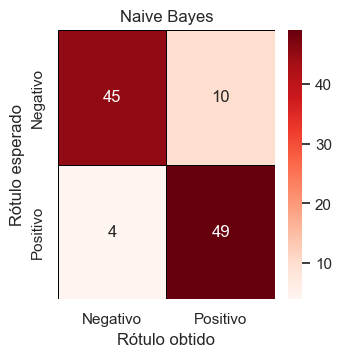

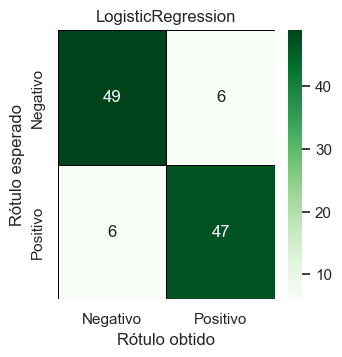

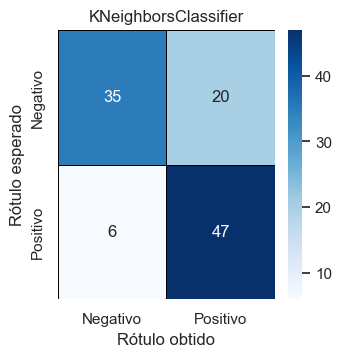

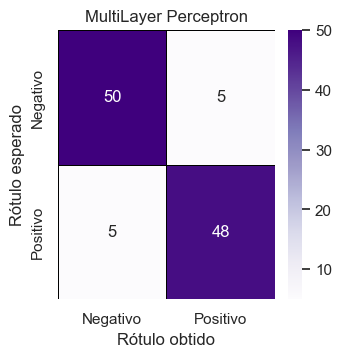

In [82]:
plot_matrix(predicaoNB, 'Reds', 'Naive Bayes')
plot_matrix(predicaoLP, 'Greens', 'LogisticRegression')
plot_matrix(predicaoKNN, 'Blues', 'KNeighborsClassifier')
plot_matrix(predicaoMLP, 'Purples', 'MultiLayer Perceptron')

plt.show()

---
### **Conclus√£o**

Em an√°lise geral da implementa√ß√£o dos algoritmos, acreditamos ter alcan√ßado resultados satisfat√≥rios em rela√ß√£o as acur√°cias obtidas pelos algoritmos, principalmente em rela√ß√£o aos algoritmos de MultiLayer Perceptron e Logistic Regression, que obtiveram os melhores resultados dentro dos modelos testados. Este cen√°rio deve-se ao fato de que os algortimos de KNN e Naive Bayes possuirem fatores que causam imprecis√£o na generaliza√ß√£o, sendo o problema de predi√ß√£o de condicional zero, no caso do NB e a imprecis√£o inerente a algortimos de agrupamento, como o KNN.

Este fator pode ser observado nas matrizes de confus√£o e tabelas acima, que foram gerados a partir do modelo testado de cada algortimo, atrav√©s do m√©todo de *cross-validation* no *dataset* de treino, como foi destacado anteriormente. 

Tambe√©m podemos concluir que as metricas com a predi√ß√£oo e r√≥tulos de testes trouxeram resultados melhores que as de valida√ß√£o e *cross-validation* do treino, fator provavelmente causado por termos separado os *datasets* de forma aleat√≥ria e os *tweets* rotulados do treino ficarem melhor rotulados. Como por exemplo, o texto "@heinzeoficial vampir√£o üßõ", que √© poss√≠vel apenas afirmar algum r√≥tulo de classifica√ß√£o com contexto pr√©vio que "vampir√£o" √© algo negativo, e como essa foi a unica rocorrenc√™ncia dessa cita√ß√£o no *dataset* os algortimos n√£o conseguiram aplicar o rotulo esperado.


